#  Znailla Bank Marketing Optimization

An end-to-end machine learning pipeline for customer targeting using telemarketing campaign data.

## 1.  Data Collection and Preparation

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 2.  Feature Engineering and Selection

In [17]:
# Identify categorical and numerical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols.remove('y') if 'y' in num_cols else None

X = df.drop('y', axis=1)
y = df['y']

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

## 3.  Model Selection (Try Multiple Models)

/Applications/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:32:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063889
[LightGBM] [Info] Start training from score -2.063889


/Applications/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


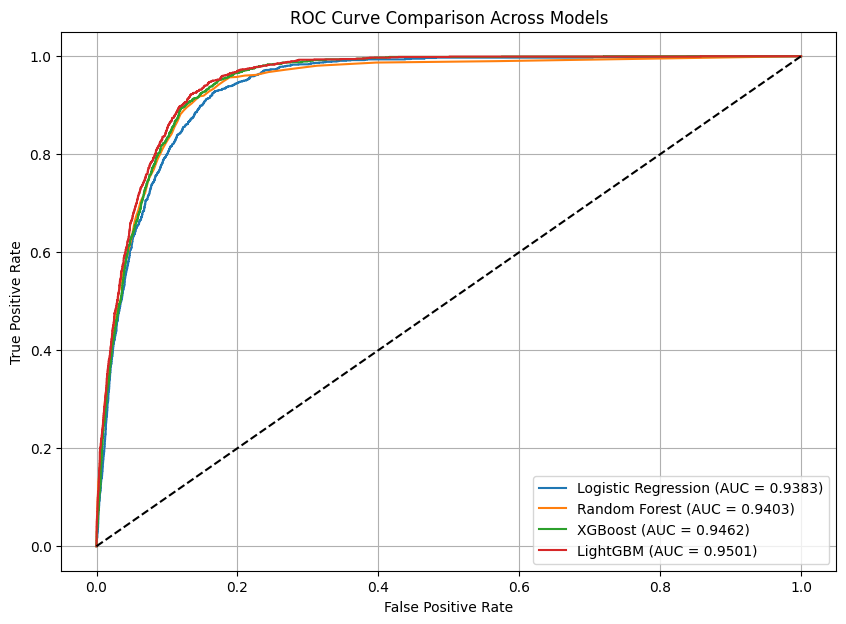

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier()
}

# Plot ROC curves
plt.figure(figsize=(10, 7))

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 4. Training and Validation of Best Model

In [19]:
# Assume LightGBM was best (update based on previous cell)
final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LGBMClassifier())
])

final_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063889
[LightGBM] [Info] Start training from score -2.063889


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


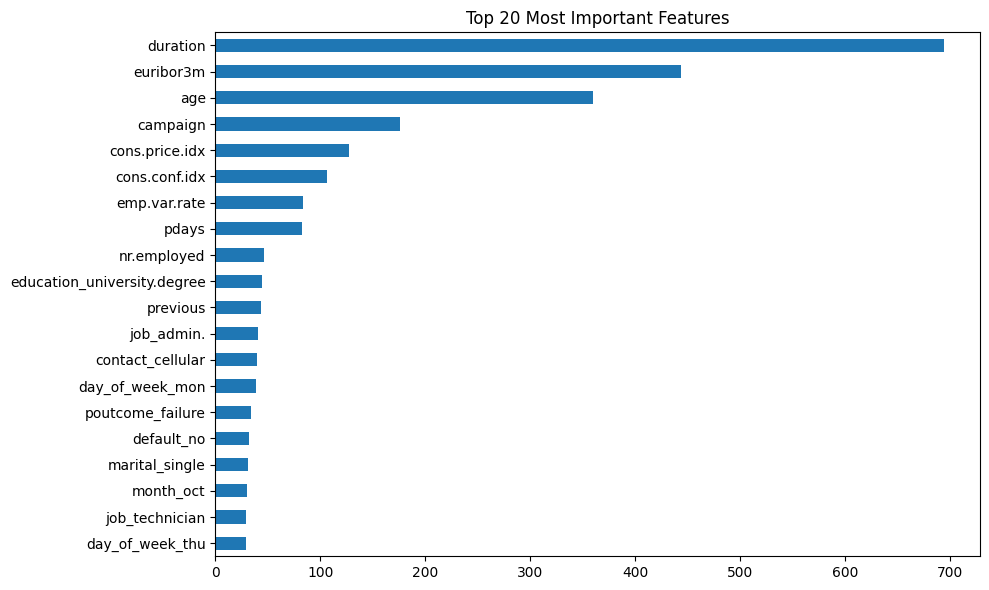

In [20]:
# Feature Importance (after final_model.fit)
import matplotlib.pyplot as plt
importances = final_model.named_steps['classifier'].feature_importances_

# Get feature names from preprocessor
ohe = final_model.named_steps['preprocessing'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out()
all_features = num_cols + list(cat_features)

# Pair names and importances
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_imp[:20].plot(kind='barh')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 5. Model Evaluation and Testing

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10965
           1       0.67      0.56      0.61      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357

ROC AUC: 0.9501076112080759


/Applications/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## 6. Deployment and Integration

In [ ]:
import joblib

# Save final model
joblib.dump(final_model, 'models/bank_marketing_final_model.pkl')
print("Model saved as 'bank_marketing_final_model.pkl'")

Model saved as 'bank_marketing_final_model.pkl'
